**Name: Prasad Madhava Kamath, PID: A59005368**

In [43]:
# -*- coding: utf-8 -*-
"""
Created on Sat Jan 22 14:29:45 2022

@author: prasad kamath
"""

import numpy as np;
import sklearn;
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
import tensorflow as tf
from  sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import metrics
import umap

In [44]:
#load MNIST dataset
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data(path="mnist.npz")

#get size of data set
#get size of each input image
xtrain_sz,m_x,n_x= x_train.shape
xtest_sz,m_xtest,n_xtest=x_test.shape
ytrain_sz= y_train.shape[0]


In [45]:
#create 1 NN classifier
knn =KNeighborsClassifier(n_neighbors=1)

<font size="5">**1- Nearest Neighbor with 60000 prototypes**<font>

In [46]:
#train the classifier to fit the data 
model_train=knn.fit(x_train.reshape(-1,28*28), y_train)
#predict the label
pred_labels=model_train.predict(x_test.reshape(-1,28*28))

#plotting for test image and predicted label 
#plt.imshow(x_test[0])
#print(pred_labels[0])
#print accuracy
print("Test accuracy for 60000 prototypes: {0}%".format(accuracy_score(y_test,pred_labels)*100))

Test accuracy for 60000 prototypes: 96.91%


<font size="5">**1- Nearest Neighbor with random prototype selection for 10000,5000,1000 samples**<font>

In [47]:
iterations=10
cummulative_accuracy=0
M_prototypes=[10000,5000,1000]
accuracy={}
std_r={}
mean_r={}
for M in M_prototypes:
    cummulative_accuracy=0
    acc_vals=[]
    for i in range(1,iterations+1):
        #get random indices in the train set range
        pts= np.random.randint(0,60000,size=M)
        xsub_train=np.array([x_train[x] for x in pts ])
        ysub_train=np.array([y_train[x] for x in pts ])
        
        #train the model
        model_train=knn.fit(xsub_train.reshape(-1,28*28), ysub_train)
        #run prediction on the test set
        pred_labels=model_train.predict(x_test.reshape(-1,28*28))
        #compute the average accuracy across 10 iterations
        acc=100*accuracy_score(y_test,pred_labels)
        cummulative_accuracy= cummulative_accuracy+acc/iterations;
        acc_vals.append(acc);
        #print accuracy
        #print("Test accuracy for {0} iteration: {1}%".format(i,100*accuracy_score(y_test,pred_labels)))
        
        #print accuracy
    std_r[M]=np.std(acc_vals)
    mean_r[M]=np.mean(acc_vals)
    accuracy[M]=cummulative_accuracy
    print("Test accuracy for {0} random prototypes: {1}%".format(M,cummulative_accuracy))
    print("Test accuracy standard deviation for {0} prototypes: {1}%".format(M,std_r[M]))
    print("Test accuracy mean for {0} prototypes: {1}%".format(M,mean_r[M]))

Test accuracy for 10000 random prototypes: 94.639%
Test accuracy standard deviation for 10000 prototypes: 0.07034912934784585%
Test accuracy mean for 10000 prototypes: 94.63900000000001%
Test accuracy for 5000 random prototypes: 93.528%
Test accuracy standard deviation for 5000 prototypes: 0.15632018423735128%
Test accuracy mean for 5000 prototypes: 93.52799999999999%
Test accuracy for 1000 random prototypes: 88.421%
Test accuracy standard deviation for 1000 prototypes: 0.3092393894703598%
Test accuracy mean for 1000 prototypes: 88.42099999999999%


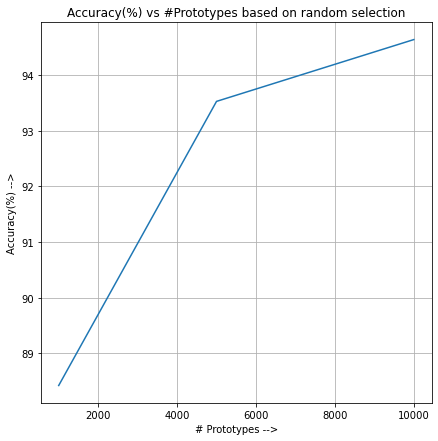

In [48]:
fig = plt.figure(1)
fig.set_figheight(7)
fig.set_figwidth(7)

ax1= fig.add_subplot(1,1,1)
ax1.title.set_text('Accuracy(%) vs #Prototypes based on random selection')
plt.xlabel('# Prototypes -->')
plt.ylabel('Accuracy(%) -->')
ax1.plot(accuracy.keys(),accuracy.values())
plt.grid(visible='True')

In [22]:
#flatten into 784 shape vector from 28*28 image each
x_train_flat=x_train.reshape(-1,28*28)
x_test_flat=x_test.reshape(-1,28*28)

<font size="5">**1- Nearest Neighbor with prototype selection using K- Means for 10000,5000,1000 samples**<font>

Experiment(1) : Finding optimal value of K for the dataset

In [23]:
#kmeans clustering model with N clusters
cluster_size=[25,75,100,200,300]
score={}
for N in cluster_size:
    kmeans = KMeans(n_clusters=N, random_state=0).fit(x_train_flat)
    score[N]=kmeans.inertia_

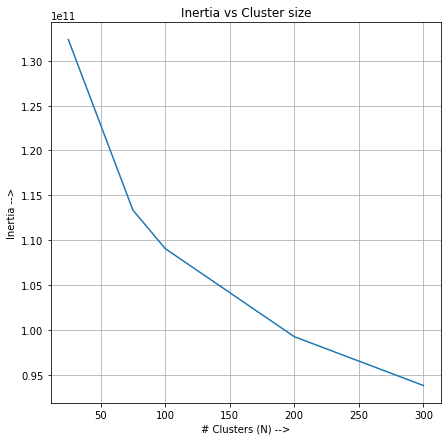

In [24]:
fig = plt.figure(1)
fig.set_figheight(7)
fig.set_figwidth(7)

ax1= fig.add_subplot(1,1,1)
ax1.title.set_text('Inertia vs Cluster size')
plt.xlabel('# Clusters (N) -->')
plt.ylabel('Inertia -->')
ax1.plot(score.keys(),score.values())
plt.grid(visible='True')

Fit for the optimal value of cluster size based on Inertia scores

In [25]:
#from graph
N_optimal=100
#fit for the optimal cluster size
kmeans = KMeans(n_clusters=N_optimal, random_state=0).fit(x_train_flat)
#get cluster centers
centers= kmeans.cluster_centers_
#get the distance of points from centroid 
distfrom_c=euclidean_distances(centers,x_train_flat)
#get the sorted indexes based on the distances sorted in ascending order (points closest to cetroid to farthest)
args=np.argsort(distfrom_c, axis=1)

1- NN using prototypes obtained after K-Means with optimal cluster size

In [41]:
iterations=5
M_prototypes=[10000,5000,1000]
accuracy_km={}
std_km={}
acc_km={}
mean_km={}
N=N_optimal
for M in  M_prototypes:
    acc_vals=[]
    cummulative_accuracy=0
    for i in range(1,iterations+1):
        #fit for the optimal cluster size
        kmeans = KMeans(n_clusters=N_optimal).fit(x_train_flat)
        #get cluster centers
        centers= kmeans.cluster_centers_
        #get the distance of points from centroid 
        distfrom_c=euclidean_distances(centers,x_train_flat)
        #get the sorted indexes based on the distances sorted in ascending order (points closest to cetroid to farthest)
        args=np.argsort(distfrom_c, axis=1)
        #number of points needed from each cluster
        pts=M//N;
        #get points 
        args_M= args[:,:pts]
        args_M=args_M.flatten()
        #creating variables for prototype subset
        xsub_train=x_train_flat[args_M]
        ysub_train=y_train[args_M]
        model_train=knn.fit(xsub_train, ysub_train)
        pred_labels=model_train.predict(x_test_flat)
        acc=100*accuracy_score(y_test,pred_labels)
        cummulative_accuracy= cummulative_accuracy+acc/iterations;
        acc_vals.append(acc)
        #print accuracy
        #print("Test accuracy for {0} iteration: {1}%".format(i,100*accuracy_score(y_test,pred_labels)))
    std_km[M]=np.std(acc_vals)
    mean_km[M]=np.mean(acc_vals)
    accuracy_km[M]=cummulative_accuracy
    #print accuracy
    print("Test accuracy for {0} prototypes: {1}%".format(M,accuracy_km[M]))
    print("Test accuracy standard deviation for {0} prototypes: {1}%".format(M,std_km[M]))
    print("Test accuracy mean for {0} prototypes: {1}%".format(M,mean_km[M]))

Test accuracy for 10000 prototypes: 93.168%
Test accuracy standard deviation for 10000 prototypes: 0.19301813386311625%
Test accuracy mean for 10000 prototypes: 93.16799999999999%
Test accuracy for 5000 prototypes: 92.01599999999999%
Test accuracy standard deviation for 5000 prototypes: 0.1081850266903908%
Test accuracy mean for 5000 prototypes: 92.01599999999999%
Test accuracy for 1000 prototypes: 89.2%
Test accuracy standard deviation for 1000 prototypes: 0.3684019543922123%
Test accuracy mean for 1000 prototypes: 89.2%


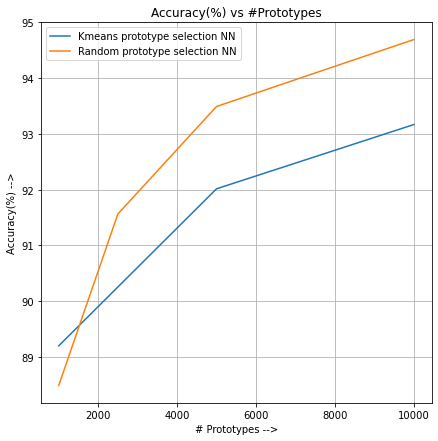

In [42]:
fig = plt.figure(2)
fig.set_figheight(7)
fig.set_figwidth(7)

ax1= fig.add_subplot(1,1,1)
ax1.title.set_text('Accuracy(%) vs #Prototypes')
plt.xlabel('# Prototypes -->')
plt.ylabel('Accuracy(%) -->')
curve1,=ax1.plot(accuracy_km.keys(),accuracy_km.values())
curve2,=ax1.plot(accuracy.keys(),accuracy.values())
plt.grid(visible='True')
curve1.set_label('Kmeans prototype selection NN')
curve2.set_label('Random prototype selection NN')
plt.legend()

<font size="5">**1- Nearest Neighbor with prototype selection using UMAP followed by K- Means for 1000,5000,1000 samples**<font>

Experiment(2) : Dimensionality reduction before K means

In [31]:
# use the manifold mapping to transform data to lower dimensionality
components=[16,32,64]
x_train_embedset={}
x_test_embedset={}
for component in components:
    mmap = umap.UMAP( n_neighbors=30,n_components=component,random_state=42, metric='cosine')
    x_train_embedset[component]= mmap.fit_transform(x_train_flat,y_train)
    x_test_embedset[component]= mmap.transform(x_test_flat)

In [32]:
#kmeans clustering model with N clusters
cluster_size=[25,75,100,200,300]
score2={}
for component in components:
    for N in cluster_size:
        kmeans = KMeans(n_clusters=N, random_state=0).fit(x_train_embedset[component])
        score2[(component,N)]=kmeans.inertia_

In [33]:
print(score2.items())
optimal_components=16

dict_items([((16, 25), 23011.595703125), ((16, 75), 8849.8154296875), ((16, 100), 6874.8505859375), ((16, 200), 4094.91259765625), ((16, 300), 3066.587890625), ((32, 25), 23343.537109375), ((32, 75), 8870.5751953125), ((32, 100), 6966.44140625), ((32, 200), 4082.95556640625), ((32, 300), 3076.156494140625), ((64, 25), 24187.84375), ((64, 75), 8934.6806640625), ((64, 100), 6961.16943359375), ((64, 200), 4106.857421875), ((64, 300), 3077.81591796875)])


In [34]:
#get the embedding for the optimal number of components given 30 neighbors
x_train_embed=x_train_embedset[optimal_components]
x_test_embed=x_test_embedset[optimal_components]

In [36]:
#kmeans clustering model with N clusters, N>=10
N=100
kmeans = KMeans(n_clusters=N, random_state=0).fit(x_train_embed)
#get cluster centers
centers= kmeans.cluster_centers_
#get the distance of points from centroid 
distfrom_c=euclidean_distances(centers,x_train_embed)
#get the sorted indexes based on the distances sorted in ascending order (points closest to cetroid to farthest)
args=np.argsort(distfrom_c, axis=1)

In [39]:
iterations=5
M_prototypes=[10000,5000,1000]
accuracy_kmeans={}
std_kmeans={}
mean_kmeans={}
for M in  M_prototypes:
    acc_vals=[]
    cummulative_accuracy=0
    for i in range(1,iterations+1):
        #mappinng to low dimension
        mmap = umap.UMAP( n_neighbors=30,n_components=optimal_components, metric='cosine')
        x_train_embed= mmap.fit_transform(x_train_flat,y_train)
        x_test_embed= mmap.transform(x_test_flat)
        N=100
        kmeans = KMeans(n_clusters=N).fit(x_train_embed)
        #get cluster centers
        centers= kmeans.cluster_centers_
        #get the distance of points from centroid 
        distfrom_c=euclidean_distances(centers,x_train_embed)
        #get the sorted indexes based on the distances sorted in ascending order (points closest to cetroid to farthest)
        args=np.argsort(distfrom_c, axis=1)
        #number of points needed from each cluster
        pts=M//N;
        #get points 
        args_M= args[:,:pts]
        args_M=args_M.flatten()
        #creating variables for prototype subset
        xsub_train=x_train_embed[args_M]
        ysub_train=y_train[args_M]
        model_train=knn.fit(xsub_train, ysub_train)
        pred_labels=model_train.predict(x_test_embed)
        acc=100*accuracy_score(y_test,pred_labels)
        cummulative_accuracy= cummulative_accuracy+acc/iterations;
        acc_vals.append(acc)
        #print accuracy
        #print("Test accuracy for {0} iteration: {1}%".format(i,100*accuracy_score(y_test,pred_labels)))
    std_kmeans[M]=np.std(acc_vals)
    mean_kmeans[M]=np.mean(acc_vals)
    accuracy_kmeans[M]=cummulative_accuracy
    #print accuracy
    print("Test accuracy for {0} prototypes: {1}%".format(M,accuracy_kmeans[M]))
    print("Test accuracy standard deviation for {0} prototypes: {1}%".format(M,std_kmeans[M]))
    print("Test accuracy mean for {0} prototypes: {1}%".format(M,mean_kmeans[M]))

Test accuracy for 10000 prototypes: 96.73000000000002%
Test accuracy standard deviation for 10000 prototypes: 0.010954451150103737%
Test accuracy mean for 10000 prototypes: 96.72999999999999%
Test accuracy for 5000 prototypes: 96.702%
Test accuracy standard deviation for 5000 prototypes: 0.039698866482558104%
Test accuracy mean for 5000 prototypes: 96.702%
Test accuracy for 1000 prototypes: 96.632%
Test accuracy standard deviation for 1000 prototypes: 0.09724196624914547%
Test accuracy mean for 1000 prototypes: 96.63199999999999%


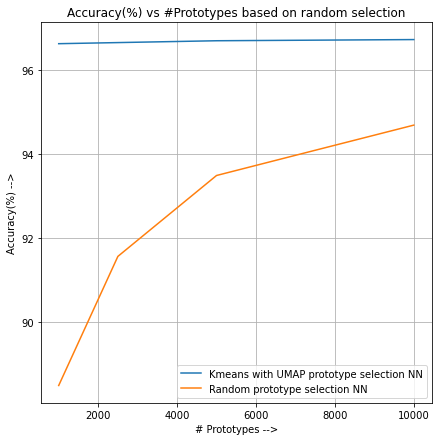

In [40]:
fig = plt.figure(2)
fig.set_figheight(7)
fig.set_figwidth(7)

ax1= fig.add_subplot(1,1,1)
ax1.title.set_text('Accuracy(%) vs #Prototypes based on random selection')
plt.xlabel('# Prototypes -->')
plt.ylabel('Accuracy(%) -->')
curve1,=ax1.plot(accuracy_kmeans.keys(),accuracy_kmeans.values())
curve2,=ax1.plot(accuracy.keys(),accuracy.values())
plt.grid(visible='True')
curve1.set_label('Kmeans with UMAP prototype selection NN')
curve2.set_label('Random prototype selection NN')
plt.legend()